In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
data=np.linspace(0,50,501)
y=np.sin(data)

In [3]:
df=pd.DataFrame(data=y,index=data,columns=["Sin"])

In [4]:
df

,Sin
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [5]:
len(df)

501

In [6]:
test_per=len(df)*0.1
test_per

50.1

In [7]:
train_set=df.iloc[:-int(test_per)]

In [8]:
train_set

,Sin
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
44.6,0.579164
44.7,0.657656
44.8,0.729577
44.9,0.794208


In [9]:
test_set=df.iloc[-int(test_per):]

In [10]:
test_set

,Sin
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591
45.6,0.998900
45.7,0.989229
45.8,0.969673
45.9,0.940429
46.0,0.901788


In [11]:
#As we know in RNN we give output from previos cell to next cell , so we should also scale the y in RNN 

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler=MinMaxScaler()
scaler.fit(train_set)

MinMaxScaler()

In [14]:
scaled_train=scaler.transform(train_set)
scaled_test=scaler.transform(test_set)

In [15]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
length=49
batch_size=1
generator=TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=batch_size)
len(generator)

402

In [17]:
val_generator=TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=batch_size)

In [18]:
n_features=1
model=Sequential()
model.add(LSTM(49,input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer="adam",loss="mse")

In [19]:
early=EarlyStopping(monitor="val_loss",patience=2)

In [20]:
model.fit(generator,epochs=20,validation_data=val_generator,callbacks=[early]);

Epoch 1/20
402/402 [==============================] - 11s 22ms/step - loss: 0.0107 - val_loss: 3.1677e-05
Epoch 2/20
402/402 [==============================] - 8s 20ms/step - loss: 1.2526e-04 - val_loss: 1.1928e-04
Epoch 3/20
402/402 [==============================] - 8s 20ms/step - loss: 2.4925e-04 - val_loss: 2.0618e-05
Epoch 4/20
402/402 [==============================] - 8s 20ms/step - loss: 4.1679e-04 - val_loss: 2.0360e-04
Epoch 5/20
402/402 [==============================] - 8s 20ms/step - loss: 1.7786e-04 - val_loss: 4.0798e-05


In [21]:
results=pd.DataFrame(model.history.history)
results

,loss,val_loss
0,0.010652,0.000032
1,0.000125,0.000119
2,0.000249,0.000021
3,0.000417,0.000204
4,0.000178,0.000041


<AxesSubplot:>

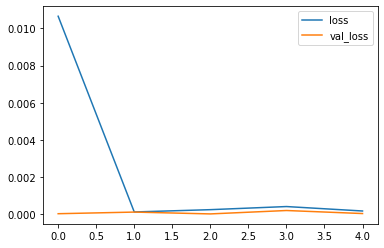

In [22]:
results.plot()

In [23]:
first_Eval_batch=scaled_train[-length:].reshape(1,length,n_features)
first_Eval_batch.shape

(1, 49, 1)

In [24]:
prediction_firs_batch=model.predict(first_Eval_batch)

In [25]:
prediction_firs_batch

array([[0.956764]], dtype=float32)

In [26]:
#first prediction will be the first item in test data
scaled_test[0]

array([0.94955134])

In [27]:
#now we need to make a for loop to find the next series

In [28]:
all_predictions=[]
eval_batch=scaled_train[-length:].reshape(1,length,n_features)   

for i in range(len(test_set)):
    prediction_curr_batch=model.predict(eval_batch)
    eval_batch= np.append(eval_batch[:,1:,:],[prediction_curr_batch],axis=1)
    all_predictions.append(prediction_curr_batch[0])

In [29]:
all_predictions

[array([0.956764], dtype=float32),
 array([0.977249], dtype=float32),
 array([0.99299026], dtype=float32),
 array([1.0038486], dtype=float32),
 array([1.0097392], dtype=float32),
 array([1.0106608], dtype=float32),
 array([1.0066818], dtype=float32),
 array([0.9979322], dtype=float32),
 array([0.98458725], dtype=float32),
 array([0.96685976], dtype=float32),
 array([0.94499], dtype=float32),
 array([0.9192384], dtype=float32),
 array([0.88987917], dtype=float32),
 array([0.8571985], dtype=float32),
 array([0.8214916], dtype=float32),
 array([0.7830624], dtype=float32),
 array([0.7422241], dtype=float32),
 array([0.6993006], dtype=float32),
 array([0.65462875], dtype=float32),
 array([0.6085596], dtype=float32),
 array([0.56145996], dtype=float32),
 array([0.5137142], dtype=float32),
 array([0.46572483], dtype=float32),
 array([0.41791216], dtype=float32),
 array([0.37071326], dtype=float32),
 array([0.3245805], dtype=float32),
 array([0.27997822], dtype=float32),
 array([0.23737869], d

In [30]:
actual_predictions=scaler.inverse_transform(all_predictions)

In [31]:
test_set["predictions"]=actual_predictions

<ipython-input-31-8474686009f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set["predictions"]=actual_predictions


In [32]:
test_set

,Sin,predictions
45.1,0.899097,0.913522
45.2,0.938307,0.954492
45.3,0.968142,0.985974
45.4,0.988304,1.007691
45.5,0.998591,1.019472
45.6,0.998900,1.021315
45.7,0.989229,1.013357
45.8,0.969673,0.995858
45.9,0.940429,0.969168
46.0,0.901788,0.933714


<AxesSubplot:>

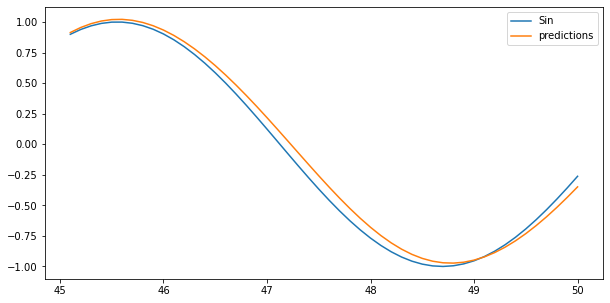

In [33]:
test_set.plot(figsize=(10,5))

In [34]:
forecasting=[]
eval_batch=scaled_train[-length:].reshape(1,length,n_features)   

for i in range(25):
    prediction_curr_batch=model.predict(eval_batch)
    eval_batch= np.append(eval_batch[:,1:,:],[prediction_curr_batch],axis=1)
    forecasting.append(prediction_curr_batch[0])

In [35]:
forecasting

[array([0.956764], dtype=float32),
 array([0.977249], dtype=float32),
 array([0.99299026], dtype=float32),
 array([1.0038486], dtype=float32),
 array([1.0097392], dtype=float32),
 array([1.0106608], dtype=float32),
 array([1.0066818], dtype=float32),
 array([0.9979322], dtype=float32),
 array([0.98458725], dtype=float32),
 array([0.96685976], dtype=float32),
 array([0.94499], dtype=float32),
 array([0.9192384], dtype=float32),
 array([0.88987917], dtype=float32),
 array([0.8571985], dtype=float32),
 array([0.8214916], dtype=float32),
 array([0.7830624], dtype=float32),
 array([0.7422241], dtype=float32),
 array([0.6993006], dtype=float32),
 array([0.65462875], dtype=float32),
 array([0.6085596], dtype=float32),
 array([0.56145996], dtype=float32),
 array([0.5137142], dtype=float32),
 array([0.46572483], dtype=float32),
 array([0.41791216], dtype=float32),
 array([0.37071326], dtype=float32)]

In [36]:
forecasting=scaler.inverse_transform(forecasting)

In [37]:
forecasting

array([[ 0.9135224 ],
       [ 0.95449216],
       [ 0.98597437],
       [ 1.00769079],
       [ 1.01947191],
       [ 1.02131511],
       [ 1.01335724],
       [ 0.99585817],
       [ 0.96916849],
       [ 0.93371379],
       [ 0.88997458],
       [ 0.83847182],
       [ 0.77975384],
       [ 0.71439299],
       [ 0.64297981],
       [ 0.56612202],
       [ 0.48444607],
       [ 0.39859974],
       [ 0.30925679],
       [ 0.21711924],
       [ 0.1229207 ],
       [ 0.02742994],
       [-0.06854803],
       [-0.1641726 ],
       [-0.25856963]])

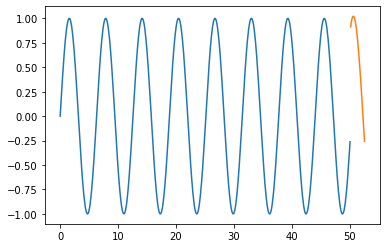

In [51]:
plt.plot(df.index,df['Sin'])
plt.plot(np.arange(50.1,52.6,step=0.1),forecasting)

In [53]:
data=np.append(df['Sin'],forecasting)
index=np.append(df.index,np.arange(50.1,52.6,step=0.1))

In [54]:
final_df=pd.DataFrame(data=data,index=index)


<AxesSubplot:>

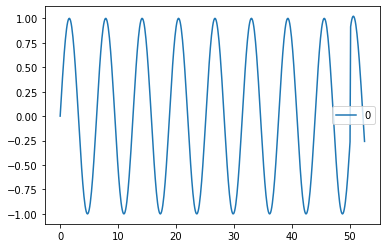

In [55]:
final_df.plot()